In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#converting dataset into dependent into independant
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
#converting chatagarical value in numerical
geography = pd.get_dummies(X['Geography'])
gender = pd.get_dummies(X['Gender'])

In [8]:
X.drop(['Geography', 'Gender'], axis = 1, inplace = True)

In [9]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
X = pd.concat([X, geography, gender], axis = 1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [13]:
#converying dataset into
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ..., -0.57369368,
         1.09168714, -1.09168714]])

In [16]:
## ANN
from tensorflow.keras import Sequential #forward backword --> epocks
from tensorflow.keras.layers import Dense #creating circle layers
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU,ReLU #activation function
from tensorflow.keras.layers import Dropout #regularization

In [17]:
classifier = Sequential()

In [18]:
classifier.add(Dense(units = 11,activation = 'relu'))
classifier.add(Dense(units = 7,activation = 'relu'))
classifier.add(Dense(units = 1,activation = 'relu'))

In [19]:
#output layers
classifier.add(Dense(units =1, activation = 'sigmoid'))

In [21]:
from keras.src import optimizers
from keras.api._v2.keras import metrics

In [22]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
#learning Rate
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate =0.01)

In [27]:
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [29]:
from sklearn.utils import validation
Model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 35)

Epoch 1/35
536/536 [==============================] - 3s 4ms/step - loss: 0.6374 - accuracy: 0.7796 - val_loss: 0.5876 - val_accuracy: 0.7955
Epoch 2/35
536/536 [==============================] - 2s 3ms/step - loss: 0.5568 - accuracy: 0.7998 - val_loss: 0.5344 - val_accuracy: 0.7963
Epoch 3/35
536/536 [==============================] - 1s 3ms/step - loss: 0.5084 - accuracy: 0.8063 - val_loss: 0.4908 - val_accuracy: 0.8118
Epoch 4/35
536/536 [==============================] - 2s 3ms/step - loss: 0.4669 - accuracy: 0.8209 - val_loss: 0.4656 - val_accuracy: 0.8190
Epoch 5/35
536/536 [==============================] - 2s 4ms/step - loss: 0.4424 - accuracy: 0.8298 - val_loss: 0.4488 - val_accuracy: 0.8194
Epoch 6/35
536/536 [==============================] - 2s 4ms/step - loss: 0.4267 - accuracy: 0.8337 - val_loss: 0.4372 - val_accuracy: 0.8277
Epoch 7/35
536/536 [==============================] - 2s 3ms/step - loss: 0.4158 - accuracy: 0.8364 - val_loss: 0.4275 - val_accuracy: 0.8281
Epoch 

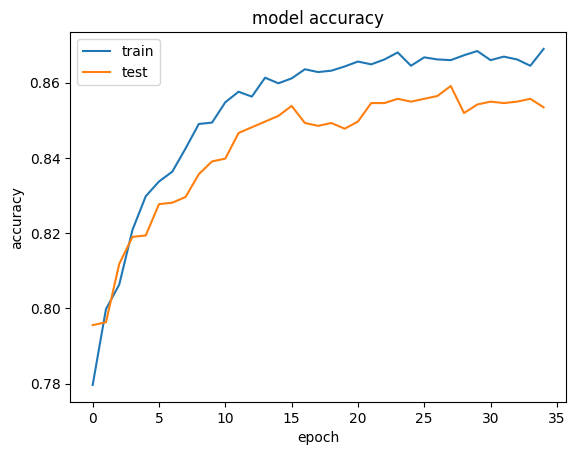

In [31]:
plt.plot(Model_history.history['accuracy'])
plt.plot(Model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()